In [3]:
from pprint import pprint
from pathlib import Path
import pandas as pd
import qlib
import os
from qlib.utils import init_instance_by_config
from qlib.workflow import R
from qlib.workflow.record_temp import SignalRecord, PortAnaRecord, SigAnaRecord
from qlib.contrib.report import analysis_model, analysis_position
from qlib.data import D

qlib.init(provider_uri="/data/linq/.qlib/qlib_data/cn_data")

[3848291:MainThread](2025-02-19 16:13:42,769) INFO - qlib.Initialization - [config.py:416] - default_conf: client.
[3848291:MainThread](2025-02-19 16:13:42,773) INFO - qlib.Initialization - [__init__.py:74] - qlib successfully initialized based on client settings.
[3848291:MainThread](2025-02-19 16:13:42,776) INFO - qlib.Initialization - [__init__.py:76] - data_path={'__DEFAULT_FREQ': PosixPath('/data/linq/.qlib/qlib_data/cn_data')}


# index size across time

<Axes: xlabel='datetime'>

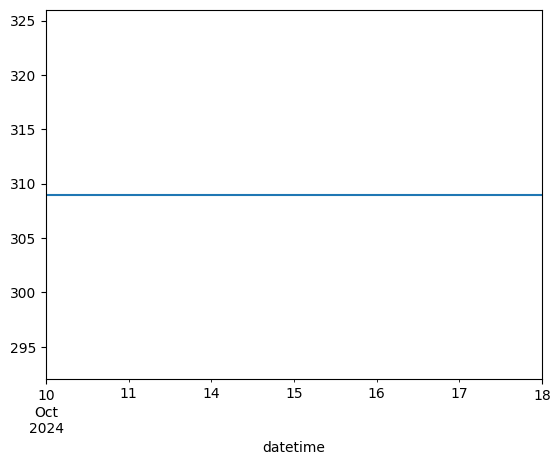

In [4]:
MARKET = 'csi300'
ST_TIME = '2024-10-10'
ED_TIME = '2024-10-19'

df = D.features(D.instruments(MARKET), ["$close"], start_time=ST_TIME, end_time=ED_TIME)
df.groupby("datetime").size().plot()

In [5]:
df

$close
instrument datetime            
SH600000   2024-10-10  2.029683
           2024-10-11  2.000153
           2024-10-14  2.047401
           2024-10-15  2.017871
           2024-10-16  2.035589
...                         ...
SZ301269   2024-10-14  1.221752
           2024-10-15  1.206100
           2024-10-16  1.190583
           2024-10-17  1.194596
           2024-10-18  1.307099

[2163 rows x 1 columns]

In [6]:
# slist = df.index.get_level_values('instrument').unique()
# path = '/data/linaiqi/.qlib/qlib_data/cn_data/instruments/scsi300.txt'
# with open(path, 'w') as f:
#     for idx in slist:
#         f.write(f'{idx}\t1899-01-01\t2099-01-1\n')

# stock filter

In [7]:
from qlib.data.filter import NameDFilter

MARKET = 'csi100'
ST_TIME = '2024-09-01'
ED_TIME = '2024-09-10'


nameDFilter = NameDFilter(name_rule_re='(SH60[0-9]{4})|(SZ00[0-9]{4})')
instruments = D.instruments(market=MARKET, filter_pipe=[nameDFilter])
act_list = D.list_instruments(instruments=instruments, start_time=ST_TIME, \
                                end_time=ED_TIME, as_list=True)

act_list[:10]

ValueError: instrument not exists: /data/linq/.qlib/qlib_data/cn_data/instruments/csi100.txt

# index history

In [11]:
ST_TIME = '2020-01-01'
ED_TIME = '2024-12-31'

from qlib.data import D
# instruments = ['SH000300'] # 沪深300（上证指数）
instruments = ['SH000852'] 
fields = ['$close', '$factor', '$close/$factor', \
          '100*(Ref($close, -1) / $close - 1)', '100*(Ref($close, -2) / Ref($close, -1) - 1)']
df = D.features(instruments, fields, start_time=ST_TIME, end_time=ED_TIME, freq='day')
df.columns = ['norm_close', 'factor', 'close', 'r0', 'r1']
df.tail()

norm_close   factor        close        r0        r1
instrument datetime                                                        
SH000852   2024-12-25    6.156349  0.00101  6094.686523  1.079059  0.180399
           2024-12-26    6.222779  0.00101  6160.451660  0.180399 -0.415409
           2024-12-27    6.234005  0.00101  6171.564941 -0.415409 -3.062367
           2024-12-30    6.208108  0.00101  6145.927734 -3.062367 -2.696139
           2024-12-31    6.017993  0.00101  5957.717285 -2.696139 -2.964932

In [12]:
r = df['close'].values

In [13]:
r

array([5676.558 , 5706.044 , 5764.7334, ..., 6171.565 , 6145.9277,
       5957.7173], dtype=float32)

In [23]:
dl=[str(k[1].date()) for k in df.index.values]

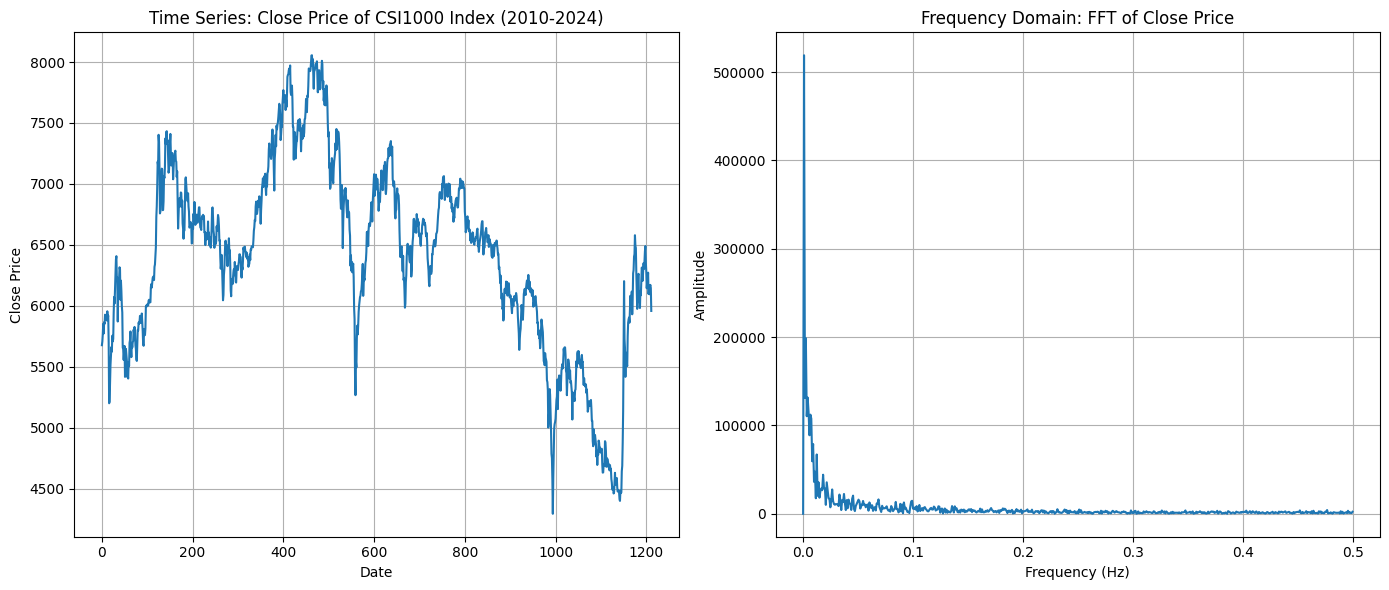

In [28]:
import numpy as np
import matplotlib.pyplot as plt

close_prices = r

# Perform Fourier Transform
fft_values = np.fft.fft(close_prices)
fft_freq = np.fft.fftfreq(len(close_prices), d=1)  # d=1 means daily frequency
fft_values[0]=0
# Plot the time series and frequency domain
plt.figure(figsize=(14, 6))

# Time Series Plot
plt.subplot(1, 2, 1)
plt.plot(close_prices, label='Close Price')
plt.title('Time Series: Close Price of CSI1000 Index (2010-2024)')
plt.xlabel('Date')
plt.ylabel('Close Price')
# plt.xticks(rotation=45)
plt.grid(True)

# Frequency Domain Plot
plt.subplot(1, 2, 2)
plt.plot(fft_freq[:len(fft_freq)//2], np.abs(fft_values)[:len(fft_values)//2])  # Plot positive frequencies
plt.title('Frequency Domain: FFT of Close Price')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()

In [9]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# fig = px.line(df, x=df.index.get_level_values('datetime'), y='close', title='沪深300')
# fig.show()

fig = make_subplots(rows=2, cols=1, subplot_titles=("Close", "Return"))
fig.add_trace(
    go.Scatter(x=df.index.get_level_values('datetime'), y=df['close'], mode='lines', name='close'),
    row=1, col=1
)
fig.add_trace(
    go.Bar(x=df.index.get_level_values('datetime'), y=df['return'], name='return'),
    row=2, col=1
)

fig.update_layout()
fig.show()

KeyError: 'return'

In [ ]:
dataset = init_instance_by_config({'class': 'DatasetH',
 'module_path': 'qlib.data.dataset',
 'kwargs': {'handler': {'class': 'Alpha158',
   'module_path': 'qlib.contrib.data.handler',
   'kwargs': {'start_time': '2024-10-15',
    'end_time': '2024-10-16',
    'fit_start_time': '2024-10-15',
    'fit_end_time': '2024-10-15',
    'instruments': {'market': 'csi300',
     'filter_pipe': [{'filter_type': 'NameDFilter',
       'name_rule_re': '(SH60[0-9]{4})|(SZ00[0-9]{4})',
       'filter_start_time': None,
       'filter_end_time': None}]}}},
  'segments': {'train': ('2024-10-14', '2024-10-16'),
   'valid': ('2024-10-15', '2024-10-15'),
   'test': ('2024-10-15', '2024-10-15')}}})
dataset.prepare('train')

[2693178:MainThread](2024-10-15 22:27:21,052) INFO - qlib.timer - [log.py:127] - Time cost: 11.625s | Loading data Done
[2693178:MainThread](2024-10-15 22:27:21,055) INFO - qlib.timer - [log.py:127] - Time cost: 0.001s | DropnaLabel Done
[2693178:MainThread](2024-10-15 22:27:21,058) INFO - qlib.timer - [log.py:127] - Time cost: 0.003s | CSZScoreNorm Done
[2693178:MainThread](2024-10-15 22:27:21,059) INFO - qlib.timer - [log.py:127] - Time cost: 0.006s | fit & process data Done
[2693178:MainThread](2024-10-15 22:27:21,059) INFO - qlib.timer - [log.py:127] - Time cost: 11.633s | Init data Done


KMID      KLEN     KMID2       KUP      KUP2  \
datetime   instrument                                                     
2024-10-14 SH600000    0.008729  0.028128  0.310344  0.013579  0.482758   
           SH600009   -0.004820  0.025801 -0.186812  0.004820  0.186812   
           SH600010    0.006024  0.018072  0.333336  0.006024  0.333332   
           SH600011   -0.006840  0.027360 -0.249997  0.009576  0.350001   
           SH600015    0.013587  0.027174  0.500002  0.012228  0.449999   
...                         ...       ...       ...       ...       ...   
           SZ002841   -0.026793  0.030208 -0.886958 -0.026005 -0.860868   
           SZ002916   -0.043947  0.038684 -1.136054 -0.040263 -1.040814   
           SZ002920   -0.060902  0.046515 -1.309278 -0.060902 -1.309278   
           SZ002938    0.011818  0.047271  0.249998  0.001126  0.023810   
           SZ003816   -0.016018  0.036613 -0.437498 -0.002288 -0.062499   

                           KLOW     KLOW2      KSFT     KSFT2     OPEN0  ...  \
datetime   instrument                                                    ...   
2024-10-14 SH600000    0.005820  0.206897  0.000970  0.034484  0.991346  ...   
           SH600009    0.016161  0.626377  0.006521  0.252753  1.004843  ...   
           SH600010    0.006024  0.333332  0.006024  0.333336  0.994012  ...   
           SH600011    0.010944  0.400002 -0.005472 -0.199996  1.006887  ...   
           SH600015    0.001359  0.049999  0.002717  0.100001  0.986595  ...   
...                         ...       ...       ...       ...       ...  ...   
           SZ002841    0.029419  0.973910  0.028631  0.947820  1.027530  ...   
           SZ002916    0.035000  0.904760  0.031316  0.809521  1.045968  ...   
           SZ002920    0.046515  1.000000  0.046515  1.000000  1.064851  ...   
           SZ002938    0.034328  0.726192  0.045020  0.952380  0.988320  ...   
           SZ003816    0.022883  0.625001  0.009153  0.250003  1.016279  ...   

                        VSUMN10   VSUMN20   VSUMN30   VSUMN60    VSUMD5  \
datetime   instrument                                                     
2024-10-14 SH600000    0.435056  0.451962  0.460663  0.473417 -0.601647   
           SH600009    0.445332  0.454117  0.469676  0.492810 -0.538038   
           SH600010    0.449366  0.461303  0.465725  0.479768 -0.632578   
           SH600011    0.429330  0.419811  0.428676  0.480447 -0.210649   
           SH600015    0.458759  0.464651  0.462549  0.473120 -0.675747   
...                         ...       ...       ...       ...       ...   
           SZ002841    0.520219  0.490248  0.470259  0.487125 -0.357161   
           SZ002916    0.459983  0.448937  0.465938  0.530593 -0.468525   
           SZ002920    0.345098  0.460724  0.487508  0.537107  0.083736   
           SZ002938    0.441898  0.447856  0.471965  0.524850 -0.206089   
           SZ003816    0.479734  0.469965  0.487247  0.490129 -0.826856   

                        VSUMD10   VSUMD20   VSUMD30   VSUMD60  LABEL0  
datetime   instrument                                                  
2024-10-14 SH600000    0.129888  0.096075  0.078674  0.053167     NaN  
           SH600009    0.109335  0.091766  0.060648  0.014381     NaN  
           SH600010    0.101268  0.077393  0.068550  0.040464     NaN  
           SH600011    0.141339  0.160377  0.142649  0.039106     NaN  
           SH600015    0.082481  0.070698  0.074902  0.053759     NaN  
...                         ...       ...       ...       ...     ...  
           SZ002841   -0.040437  0.019504  0.059482  0.025751     NaN  
           SZ002916    0.080034  0.102126  0.068124 -0.061185     NaN  
           SZ002920    0.309804  0.078552  0.024985 -0.074214     NaN  
           SZ002938    0.116205  0.104289  0.056070 -0.049700     NaN  
           SZ003816    0.040532  0.060071  0.025507  0.019742     NaN  

[248 rows x 159 columns]